In [1]:
#pip install tensorflow==2.6.0
#pip install keras==2.6.0
#python==3.7

In [2]:
#import tensorflow as tf
#tf.keras.xxx

In [3]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd 
import re
import jieba
import jieba.analyse as analyse 
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer  
from keras.models import Sequential  
from keras.layers import Dense,Flatten 
from keras.layers import Embedding

In [4]:
data = pd.read_table('data.txt',encoding='UTF-8') #读取txt文件
data.tail() #查看数据

,content,class,label
878,：其在A区B大厦C座D公寓342在“闲鱼”上看到买手机的广告用微信加了对方微信谈好价格后通过...,购物消费,3.0
879,：其在A区B路6D大厦C座E公寓8332室收到一条要买其挂在转转上出售的英雄联盟游戏账号的消...,购物消费,3.0
880,NaN,购物消费,NaN
881,NaN,购物消费,NaN
882,：其在A区B大厦C座D公寓342在“闲鱼”上看到买手机的广告用微信加了对方微信谈好价格后通过...,NaN,4.0


In [5]:
data.isnull().sum()

content    2
class      1
label      2
dtype: int64

In [6]:
data = data.dropna() #删除缺失值
data.isnull().sum() #检查是否删干净

content    0
class      0
label      0
dtype: int64

In [7]:
#定义删除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line) #转化为字符型
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]") #匹配其他字符
    line = rule.sub('',line) #将匹配到的字符替换为空
    return line

#停用词列表
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath,'r',  encoding='utf-8').readlines()]  #逐行提取停用词
    return stopwords  

#加载停用词
stopwords = stopwordslist('stopwords.txt')

In [8]:
data['content_clean'] = data['content'].apply(remove_punctuation) #对content列调用定义的remove_punctuation函数

In [9]:
#将删除掉不需要字符后的内容进行分词，并过滤停用词，停用词是在语言处理中不需要的语气词，符号等
data['cut_content'] = data['content_clean'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopwords])) #去除停用词
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xiayu\AppData\Local\Temp\jieba.cache
Loading model cost 0.494 seconds.
Prefix dict has been built successfully.


,content,class,label,content_clean,cut_content
0,：其在某地区客房门口其的MChat的APP软件收到一个自称是可以提供色情服务的客服信息MCh...,婚恋交友,4.0,其在某地区客房门口其的MChat的APP软件收到一个自称是可以提供色情服务的客服信息MCha...,地区 客房 门口 MChat APP 软件 收到 自称 提供 色情 服务 客服 信息 MCh...
1,某地区派出所接报案称：其位于某某路小区其系淘宝卖家其发现其淘宝店铺内有一笔订单申请退款但未有...,购物消费,3.0,某地区派出所接报案称其位于某某路小区其系淘宝卖家其发现其淘宝店铺内有一笔订单申请退款但未有实...,地区 派出所 接 报案 称其 位于 路 小区 其系 淘宝 卖家 发现 淘宝 店铺 内有 一笔...
2,：其位于科创园5楼其微信加对方微信对方称可以帮其办理分期贷款其相信其按照对方要求操作其通过其...,信贷理财,6.0,其位于科创园5楼其微信加对方微信对方称可以帮其办理分期贷款其相信其按照对方要求操作其通过其微...,位于 科创园 楼其微 信加 微信 帮其 办理 分期 贷款 操作 其微 信以 微信 扫码 方式...
3,：其看到可以进行刷单其微信加对方微信其按照对方要求操作其点开对方发来的链接其操作后其发现其微...,招聘兼职,5.0,其看到可以进行刷单其微信加对方微信其按照对方要求操作其点开对方发来的链接其操作后其发现其微信...,刷单 其微 信加 微信 操作 其点 开 发来 链接 操作 发现 其微 信分 多笔 转账 29...
4,：其在转转APP上看到一只猫事主就加对方微信事主微信。事主就和对方在微信上商量好价钱后事主用...,购物消费,3.0,其在转转APP上看到一只猫事主就加对方微信事主微信事主就和对方在微信上商量好价钱后事主用微信...,转转 APP 一只 猫 事主 就加 微信 事主 微信 事主 微信 商量 价钱 事主 微信 扫...


In [10]:
#将删除掉不需要字符后的内容进行分词，并过滤停用词，停用词是在语言处理中不需要的语气词，符号等
#感觉这步有点多余？因为不会再分词了
data['cut_content'] = data['cut_content'].apply(lambda x: " ".join([w for w in list(jieba.cut(x)) if w not in stopwords]))
data.head()

,content,class,label,content_clean,cut_content
0,：其在某地区客房门口其的MChat的APP软件收到一个自称是可以提供色情服务的客服信息MCh...,婚恋交友,4.0,其在某地区客房门口其的MChat的APP软件收到一个自称是可以提供色情服务的客服信息MCha...,地区 客房 门口 MChat APP 软件 收到 自称 提供...
1,某地区派出所接报案称：其位于某某路小区其系淘宝卖家其发现其淘宝店铺内有一笔订单申请退款但未有...,购物消费,3.0,某地区派出所接报案称其位于某某路小区其系淘宝卖家其发现其淘宝店铺内有一笔订单申请退款但未有实...,地区 派出所 接 报案 称其 位于 路 小区 其系 淘宝...
2,：其位于科创园5楼其微信加对方微信对方称可以帮其办理分期贷款其相信其按照对方要求操作其通过其...,信贷理财,6.0,其位于科创园5楼其微信加对方微信对方称可以帮其办理分期贷款其相信其按照对方要求操作其通过其微...,位于 科创园 楼其微 信加 微信 帮其 办理 分期 贷款 ...
3,：其看到可以进行刷单其微信加对方微信其按照对方要求操作其点开对方发来的链接其操作后其发现其微...,招聘兼职,5.0,其看到可以进行刷单其微信加对方微信其按照对方要求操作其点开对方发来的链接其操作后其发现其微信...,刷单 其微 信加 微信 操作 其点 开 发来 链接 操作...
4,：其在转转APP上看到一只猫事主就加对方微信事主微信。事主就和对方在微信上商量好价钱后事主用...,购物消费,3.0,其在转转APP上看到一只猫事主就加对方微信事主微信事主就和对方在微信上商量好价钱后事主用微信...,转转 APP 一只 猫 事主 就加 微信 事主 微信 事...


## LSTM

In [11]:
# 设置最频繁使用的50000个词
max_words = 2000 #50000
# 每条cut_review最大的长度
max_len = 150 #250
# 设置Embeddingceng层的维度
embedding_dim = 200
 
tokenizer = Tokenizer(num_words=max_words) #分词，即文本拆分为标记的过程
tokenizer.fit_on_texts(data['cut_content'].values) #用以训练的文本列表
word_index = tokenizer.word_index #将单词（字符串）映射为它们的排名或者索引
print('共有 %s 个不相同的词语.' % len(word_index))

共有 4335 个不相同的词语.


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# 文本转化为序列
X = tokenizer.texts_to_sequences(data['cut_content'].values) #

#填充X,让X的各个列的长度统一
X = pad_sequences(X, maxlen=max_len) #截取为相同长度的序列
 
#多类标签的onehot展开
Y = pd.get_dummies(data['label']).values #对标签进行独热编码category
print(X.shape)
print(Y.shape)

(880, 150)
(880, 9)


In [14]:
#拆分训练集和测试集
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
#print(X_train,Y_train)
#print('*'*100)
#print(X_test.shape,Y_test.shape)

In [15]:
#拆分数据集，取80%留作训练和测试，20%用作验证
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
Y_train = Y[:int(len(Y)*0.8)]
Y_test = Y[int(len(Y)*0.8):]

In [16]:
# 设置最频繁使用的50000个词
max_words = 2000 #50000
# 每条cut_review最大的长度
max_len = 150 #250
# 设置Embeddingceng层的维度
embedding_dim = 200

In [17]:
from keras.layers import Dropout, Dense, LSTM, SpatialDropout1D#, sparse_categorical_crossentropy
#定义模型
#神经网络非常容易过拟合，可以通过减少层数，减少神经元个数等方法调节模型
model = Sequential() #设置神经网络序列
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim)) #embedding层，设置输入输出维度
model.add(SpatialDropout1D(0.3)) #对一维特征图（feature map）进行dropout
# recurrent_dropout=0.3用于控制循环状态的线性变换的神经元断开比例
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)) #LSTM层，丢弃30%。若后面还需要接LSTM层，则return_sequences=True
model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3)) #LSTM层，丢弃30%
model.add(Dense(9, activation='softmax')) # 全连接层，转化为要预测的类别数

In [18]:
#配置模型
model.compile(loss='categorical_crossentropy', #多分类交叉熵损失函数
              optimizer='RMSProp', #优化器
              metrics=['accuracy'] #评估指标
             ) 

In [19]:
#只有 880条数据对神经网络模型是非常少的，上面我们又将其拆分为训练测试和验证部分，所以在模型训练和测试时更容易发生过拟合。
#可以再训练时只进行训练集和测试集，不设置验证集，模型准确率会好很多。

In [20]:
#导入
from keras.callbacks import EarlyStopping
# monitor:监视参数，min_delta:小于此数认为不变化（最小提升度），mode:loss小好，acc大好，patience:n周期无提升则退出， verbose=1精确模式
monitor = EarlyStopping(monitor='val_acc', min_delta=0.1, patience=4, verbose=1, mode='auto')

In [21]:
epochs = 10  #5
batch_size = 400 #64
#训练模型
history = model.fit(X_train, #训练集
                    Y_train, #标签
                    epochs=10 , #训练轮数
                    batch_size=400, #每次训练抽取样本数
#                    callbacks = [monitor],
                    validation_split=0.2, #验证集比例；相当于在训练集上再分出来一部分当验证集
                    #validation_data=(X_test,Y_test) #验证集
                   )

Epoch 1/10
2/2 [==============================] - 9s 3s/step - loss: 2.1845 - accuracy: 0.1456 - val_loss: 2.0976 - val_accuracy: 0.1915
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 2.0882 - accuracy: 0.2824 - val_loss: 2.0409 - val_accuracy: 0.1915
Epoch 3/10
2/2 [==============================] - 8s 3s/step - loss: 1.9923 - accuracy: 0.2824 - val_loss: 1.9468 - val_accuracy: 0.1915
Epoch 4/10
2/2 [==============================] - 9s 4s/step - loss: 1.8921 - accuracy: 0.2824 - val_loss: 1.9072 - val_accuracy: 0.1915
Epoch 5/10
2/2 [==============================] - 9s 4s/step - loss: 1.8515 - accuracy: 0.2824 - val_loss: 1.8961 - val_accuracy: 0.1915
Epoch 6/10
2/2 [==============================] - 9s 4s/step - loss: 1.8054 - accuracy: 0.2824 - val_loss: 1.8581 - val_accuracy: 0.2695
Epoch 7/10
2/2 [==============================] - 10s 3s/step - loss: 1.7984 - accuracy: 0.3357 - val_loss: 1.8570 - val_accuracy: 0.3404
Epoch 8/10
2/2 [========================

In [22]:
model.summary() #模型结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         400000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 200)         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 100)         120400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 9)                 459       
Total params: 551,059
Trainable params: 551,059
Non-trainable params: 0
_________________________________________________________________


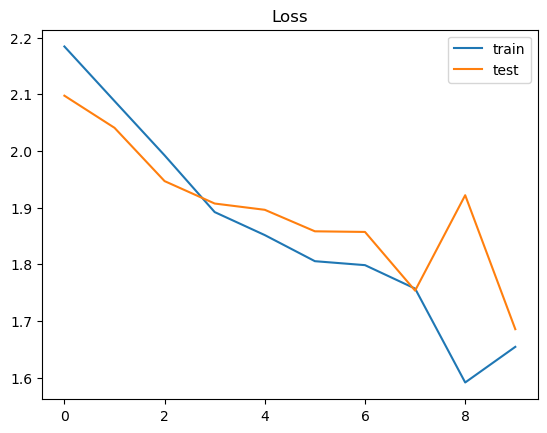

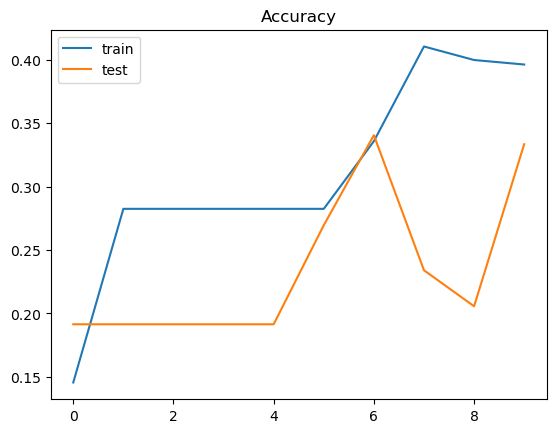

In [23]:
#绘制损失值和准确率曲线
import matplotlib.pyplot as plt  
plt.title('Loss')
plt.plot(history.history['loss'], label='train') #训练集损失
plt.plot(history.history['val_loss'], label='test') #测试集损失
plt.legend() # 添加图例
plt.show()

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train') #训练集准确率
plt.plot(history.history['val_accuracy'], label='test') #测试集准确率
plt.legend()
plt.show()

In [24]:
#loss acc
model.evaluate(X_test,Y_test) #测试集评估

6/6 [==============================] - 1s 141ms/step - loss: 1.6468 - accuracy: 0.4034


[1.6467604637145996, 0.40340909361839294]

In [25]:
#保存模型  
#from keras.utils import plot_model  

model.save('model_LSTM.h5')  #  生成模型文件 'my_model.h5'  

In [26]:
#加载模型 
from keras.models import load_model 

model2 = load_model('model_LSTM.h5') #加载储存的模型

In [27]:
#验证集标签预测
y_pred = model2.predict(X_test) #对验证集进行预测，预测结果为概率
y_pred = y_pred.argmax(axis = 1) #每行最大值的索引，即概率最大的索引也是标签
y_pred

array([0, 2, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 5, 5, 5, 2, 5,
       5, 5, 2, 5, 5, 5, 5, 4, 0, 5, 5, 5, 5, 5, 2, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 2, 2, 5, 2, 2, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 2, 5, 4, 2, 4, 4, 4, 5, 5, 5, 7, 0, 4, 4, 4, 8,
       4, 5, 5, 5, 5, 4, 5, 5, 7, 5, 2, 2, 5, 2, 2, 5, 5, 5, 5, 5, 2, 2,
       5, 5, 5, 2, 2, 5, 5, 2, 5, 5, 2, 5, 2, 5, 5, 2, 5, 5, 5, 5, 4, 2,
       2, 5, 5, 2, 4, 2, 2, 7, 5, 5, 5, 4, 4, 7, 2, 2, 4, 5, 5, 4, 4, 4],
      dtype=int64)

In [28]:
Y_test.argmax(axis=1)

array([0, 2, 5, 2, 0, 1, 7, 2, 0, 8, 5, 3, 2, 3, 0, 5, 0, 2, 2, 2, 2, 4,
       2, 5, 0, 2, 4, 2, 5, 2, 7, 5, 5, 0, 1, 2, 8, 5, 8, 7, 8, 4, 8, 4,
       4, 4, 2, 7, 4, 4, 8, 4, 0, 5, 5, 7, 7, 7, 2, 8, 8, 7, 7, 7, 5, 2,
       1, 0, 2, 0, 2, 5, 7, 7, 5, 3, 2, 2, 5, 3, 2, 4, 5, 2, 0, 0, 5, 5,
       4, 7, 1, 4, 4, 5, 2, 0, 4, 2, 4, 4, 4, 5, 5, 5, 7, 0, 2, 4, 2, 8,
       0, 5, 5, 0, 3, 2, 1, 5, 7, 0, 3, 2, 7, 8, 2, 2, 5, 5, 7, 5, 2, 2,
       5, 5, 2, 8, 3, 0, 2, 3, 0, 7, 2, 7, 3, 0, 7, 3, 5, 5, 4, 5, 4, 2,
       2, 5, 5, 3, 2, 3, 3, 7, 7, 5, 5, 0, 0, 7, 2, 2, 2, 0, 2, 0, 2, 2],
      dtype=int64)

Text(0.5, 60.7222222222222, '预测结果')

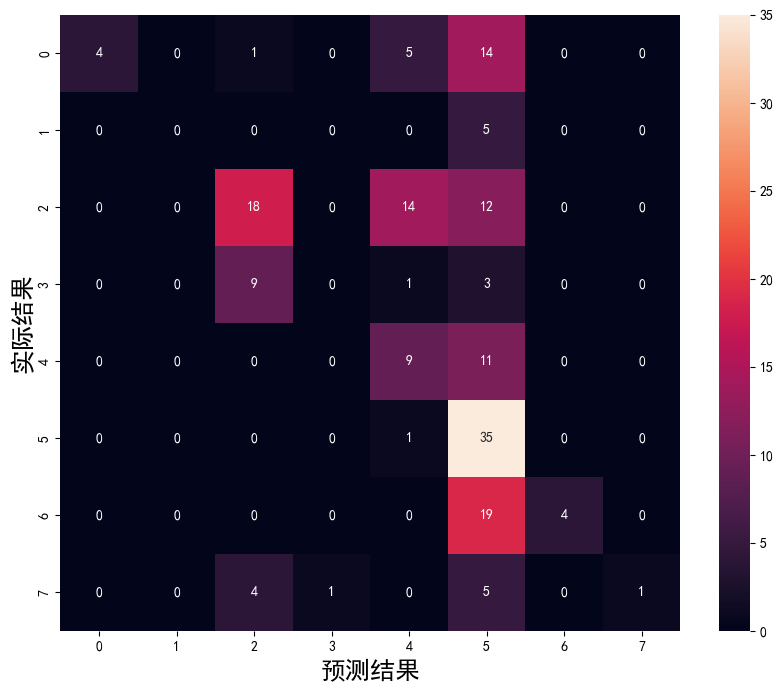

In [29]:
import seaborn as sns
from sklearn.metrics import  confusion_matrix
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

conf_mat = confusion_matrix(Y_test.argmax(axis=1) , y_pred) #混淆矩阵
fig = plt.figure(figsize=(10,8)) #设置图像大小
sns.heatmap(conf_mat, annot=True, fmt='d') #绘制热度图
plt.ylabel('实际结果',fontsize=18)
plt.xlabel('预测结果',fontsize=18)